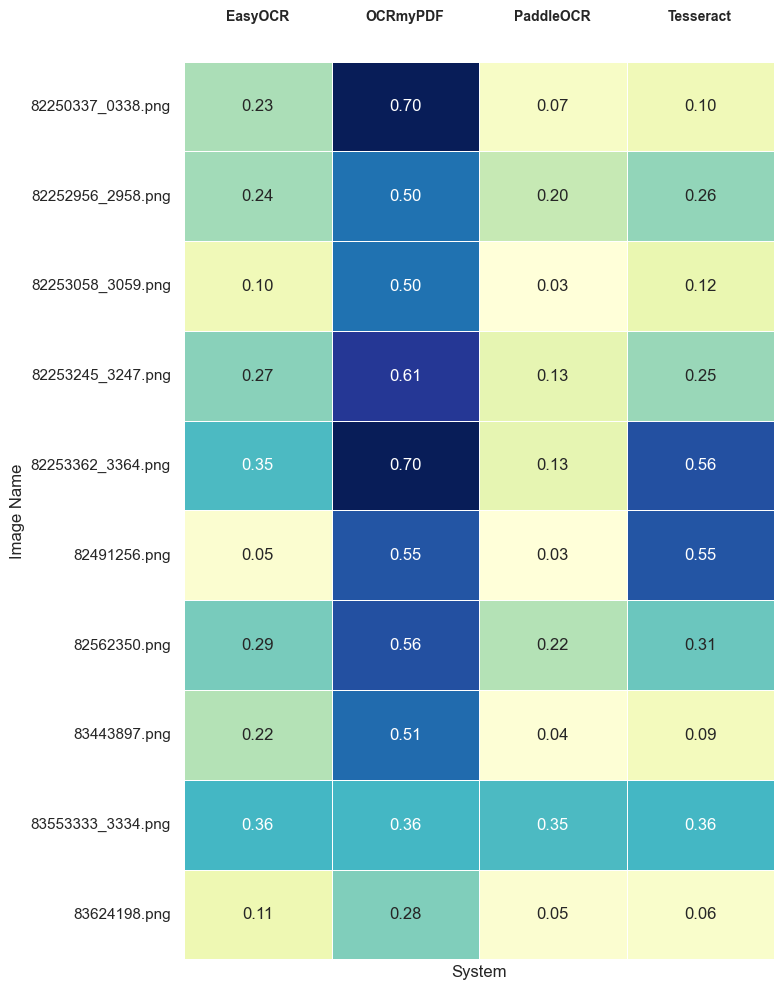

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO

data = """
Image Name,System,CER,WER
82250337_0338.png,Tesseract,0.10±0.18,0.66±1.20
82250337_0338.png,OCRmyPDF,0.70±0.13,4.62±0.78
82250337_0338.png,EasyOCR,0.23±0.11,1.50±0.68
82250337_0338.png,PaddleOCR,0.07±0.11,0.48±0.72
82252956_2958.png,Tesseract,0.26±0.18,1.51±1.20
82252956_2958.png,OCRmyPDF,0.50±0.13,2.96±0.78
82252956_2958.png,EasyOCR,0.24±0.11,1.44±0.68
82252956_2958.png,PaddleOCR,0.20±0.11,1.19±0.72
82253058_3059.png,Tesseract,0.12±0.18,0.82±1.20
82253058_3059.png,OCRmyPDF,0.50±0.13,3.50±0.78
82253058_3059.png,EasyOCR,0.10±0.11,0.73±0.68
82253058_3059.png,PaddleOCR,0.03±0.11,0.23±0.72
82253245_3247.png,Tesseract,0.25±0.18,1.49±1.20
82253245_3247.png,OCRmyPDF,0.61±0.13,3.55±0.78
82253245_3247.png,EasyOCR,0.27±0.11,1.57±0.68
82253245_3247.png,PaddleOCR,0.13±0.11,0.75±0.72
82253362_3364.png,Tesseract,0.56±0.18,3.27±1.20
82253362_3364.png,OCRmyPDF,0.70±0.13,4.04±0.78
82253362_3364.png,EasyOCR,0.35±0.11,2.06±0.68
82253362_3364.png,PaddleOCR,0.13±0.11,0.78±0.72
82491256.png,Tesseract,0.55±0.18,3.86±1.20
82491256.png,OCRmyPDF,0.55±0.13,3.80±0.78
82491256.png,EasyOCR,0.05±0.11,0.35±0.68
82491256.png,PaddleOCR,0.03±0.11,0.18±0.72
82562350.png,Tesseract,0.31±0.18,1.85±1.20
82562350.png,OCRmyPDF,0.56±0.13,3.40±0.78
82562350.png,EasyOCR,0.29±0.11,1.78±0.68
82562350.png,PaddleOCR,0.22±0.11,1.34±0.72
83443897.png,Tesseract,0.09±0.18,0.56±1.20
83443897.png,OCRmyPDF,0.51±0.13,3.25±0.78
83443897.png,EasyOCR,0.22±0.11,1.42±0.68
83443897.png,PaddleOCR,0.04±0.11,0.27±0.72
83553333_3334.png,Tesseract,0.36±0.18,2.56±1.20
83553333_3334.png,OCRmyPDF,0.36±0.13,2.58±0.78
83553333_3334.png,EasyOCR,0.36±0.11,2.63±0.68
83553333_3334.png,PaddleOCR,0.35±0.11,2.52±0.72
83624198.png,Tesseract,0.06±0.18,0.36±1.20
83624198.png,OCRmyPDF,0.28±0.13,1.83±0.78
83624198.png,EasyOCR,0.11±0.11,0.72±0.68
83624198.png,PaddleOCR,0.05±0.11,0.35±0.72
"""

df = pd.read_csv(StringIO(data))

df = df[df['Image Name'] != 'overall_average']

df['CER_numeric'] = pd.to_numeric(df['CER'].str.split('±').str[0], errors='coerce')

heatmap_cer = df.pivot(index='Image Name', columns='System', values='CER_numeric')
heatmap_wer = df.pivot(index='Image Name', columns='System', values='WER')

sns.set(style="whitegrid")

plt.figure(figsize=(8, 10))
ax = sns.heatmap(
    heatmap_cer,
    annot=heatmap_cer,
    cmap='YlGnBu',
    fmt='.2f',  # Format annotations as floats
    linewidths=.5,
    cbar=False,  # Remove the color bar
    xticklabels=False,  # Remove default column labels
    yticklabels=True  # Enable row labels (Image Name)
)

for i, col in enumerate(heatmap_cer.columns):
    plt.text(i + 0.5, -0.5, col, ha='center', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()